Import Libraries and dataset for EDA on bikepghpublic2017

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
# File path of the Excel file
file_path = r"C:\\CMU\\2023_S2\\95829_SoftwareDesignforDataScientists\\Class_Projects\\bikepghmembers2017.csv"
#file_path = r"/Users/mattmcmon/Library/CloudStorage/GoogleDrive-mmcmon1990@gmail.com/My Drive/CMU/Software Design for Data Scientists/bikepghpublic2017.csv" #mac
#file_path = r"C:\Users\Matt\Google Drive\CMU\Software Design for Data Scientists\bikepghpublic2017.csv" #windows

In [13]:
# Load the Excel file into a DataFrame
bikepghmembers2017 = pd.read_csv(file_path)

Display sample of dataset

In [14]:
# Display the first few rows of the DataFrame
bikepghmembers2017.head()

,Response ID,Start Date,End Date,Status,Source Type,InteractPedestrian,InteractBicycle,CircumstancesCoded,FeelingsProvingGround,SafetyHuman,...,AVSafetyPotential,RegulationTesting,RegulationSpeed,RegulationSchoolZone,RegulationShareData,AdvocacyIssues,BikePghPosition,PayingAttentionAV,FamiliarityTechnoology,ZipCode
0,259886900,02/15/2017 12:11:03 PM PST,02/15/2017 12:12:27 PM PST,COMPLETE,Survey Link,Yes,Yes,9.0,Disapprove,1,...,Maybe,Yes,Yes,Yes,Yes,Disagree,Neither Support nor Oppose,Not at all,Somewhat familiar,15209.0
1,259914050,02/15/2017 1:34:14 PM PST,02/15/2017 1:38:44 PM PST,COMPLETE,Survey Link,No,Yes,9.0,Somewhat Disapprove,3,...,No,Yes,Yes,No,No,Disagree,Neither Support nor Oppose,To a moderate extent,Somewhat familiar,15090.0
2,260012773,02/16/2017 6:00:29 AM PST,02/16/2017 6:06:31 AM PST,COMPLETE,Survey Link,Yes,Yes,9.0,Neutral,2,...,Not sure,No,Yes,No,Yes,Disagree,Neither Support nor Oppose,To a moderate extent,Somewhat familiar,15212.0
3,260023580,02/16/2017 9:08:32 AM PST,02/16/2017 9:15:00 AM PST,COMPLETE,Survey Link,No,No,9.0,Approve,4,...,Yes,Yes,Yes,No,Yes,Disagree,Actively Support,To a moderate extent,Mostly Unfamiliar,15206.0
4,260023756,02/16/2017 9:12:19 AM PST,02/16/2017 9:27:38 AM PST,COMPLETE,Survey Link,No,No,9.0,Somewhat Approve,4,...,Yes,Yes,Yes,Yes,Yes,Agree,Actively Support,To a moderate extent,Somewhat familiar,15129.0


Display information on the dataset

In [15]:
# Summary statistics of the DataFrame
bikepghmembers2017.describe()

,Response ID,CircumstancesCoded,ZipCode
count,3.410000e+02,168.000000,321.000000
mean,2.600140e+08,2.369048,15281.084112
std,1.160753e+05,1.373659,814.719044
min,2.598869e+08,1.000000,11211.000000
25%,2.599127e+08,2.000000,15206.000000
50%,2.599523e+08,2.000000,15214.000000
75%,2.601654e+08,2.000000,15218.000000
max,2.602710e+08,9.000000,26003.000000


In [16]:
# Information about DataFrame
bikepghmembers2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Response ID             341 non-null    int64  
 1   Start Date              341 non-null    object 
 2   End Date                341 non-null    object 
 3   Status                  341 non-null    object 
 4   Source Type             341 non-null    object 
 5   InteractPedestrian      321 non-null    object 
 6   InteractBicycle         321 non-null    object 
 7   CircumstancesCoded      168 non-null    float64
 8   FeelingsProvingGround   321 non-null    object 
 9   SafetyHuman             321 non-null    object 
 10  SafetyAV                321 non-null    object 
 11  AVSafetyPotential       321 non-null    object 
 12  RegulationTesting       321 non-null    object 
 13  RegulationSpeed         321 non-null    object 
 14  RegulationSchoolZone    321 non-null    ob

In [17]:
# Count the number of missing values in each column
bikepghmembers2017.isnull().sum()

Response ID                 0
Start Date                  0
End Date                    0
Status                      0
Source Type                 0
InteractPedestrian         20
InteractBicycle            20
CircumstancesCoded        173
FeelingsProvingGround      20
SafetyHuman                20
SafetyAV                   20
AVSafetyPotential          20
RegulationTesting          20
RegulationSpeed            20
RegulationSchoolZone       20
RegulationShareData        20
AdvocacyIssues             20
BikePghPosition            20
PayingAttentionAV          20
FamiliarityTechnoology     20
ZipCode                    20
dtype: int64

Check for duplicate fields

In [18]:
if bikepghmembers2017.duplicated().any():
    print('There are duplicates in the bikepghmembers2017 data')
else:
    print('There are NO duplicates in the bikepghmembers2017 data')

There are NO duplicates in the bikepghmembers2017 data


Display Data Visualizations

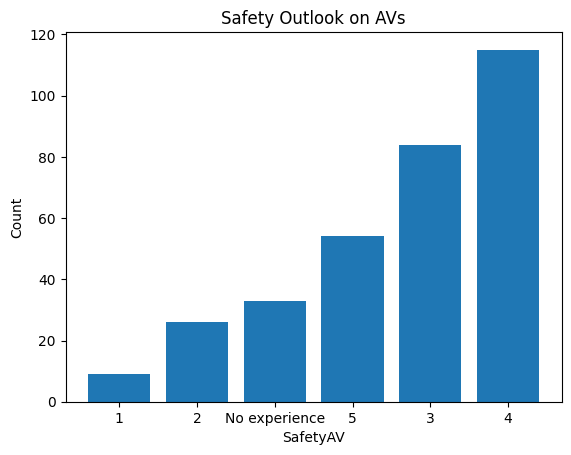

In [19]:
# Display histogram of SafetyAV variable
# Surveyed people rank how safe they feel with AVs (1-very unsafe, 5-very safe)
safetyav_counts = bikepghmembers2017['SafetyAV'].value_counts()
safetyav_sorted_counts = safetyav_counts.sort_values(ascending=True)
plt.bar(safetyav_sorted_counts.index, safetyav_sorted_counts)
plt.xlabel('SafetyAV')
plt.ylabel('Count')
plt.title('Safety Outlook on AVs')
plt.show()

In [20]:
#Displays count of each response under SafetyAV
bikepghmembers2017.groupby('SafetyAV')['SafetyAV'].size()

SafetyAV
1                  9
2                 26
3                 84
4                115
5                 54
No experience     33
Name: SafetyAV, dtype: int64

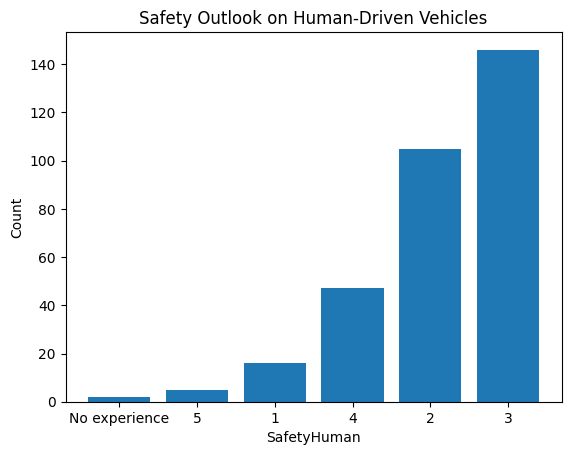

In [21]:
# Display histogram of SafetyHuman variable
# Surveyed people rank how safe they feel with human-driven cars (1-very unsafe, 5-very safe)
safehuman_counts = bikepghmembers2017['SafetyHuman'].value_counts()
safehuman_sorted_counts = safehuman_counts.sort_values(ascending=True)
plt.bar(safehuman_sorted_counts.index, safehuman_sorted_counts)
plt.xlabel('SafetyHuman')
plt.ylabel('Count')
plt.title('Safety Outlook on Human-Driven Vehicles')
plt.show()

In [22]:
#Displays count of each response under SafetyHuman
bikepghmembers2017.groupby('SafetyHuman')['SafetyHuman'].size()

SafetyHuman
1                 16
2                105
3                146
4                 47
5                  5
No experience      2
Name: SafetyHuman, dtype: int64

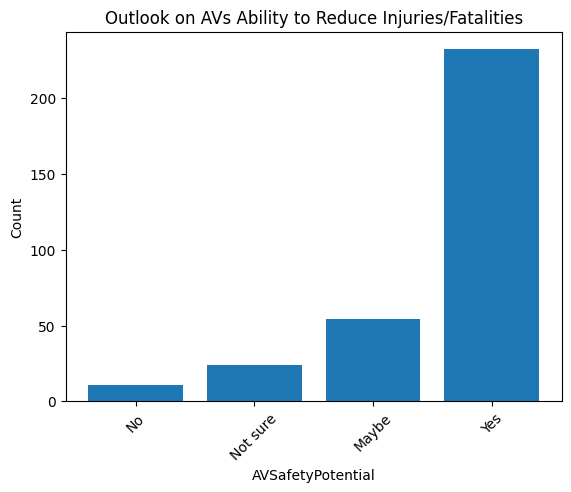

In [23]:
# Display histogram of AVSafetyPotential lvariable
# Shows outlook on whether AVs have the potential to reduce injuries and fatalities
news_counts = bikepghmembers2017['AVSafetyPotential'].value_counts()
news_sorted_counts = news_counts.sort_values(ascending=True)
plt.bar(news_sorted_counts.index, news_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('AVSafetyPotential')
plt.ylabel('Count')
plt.title('Outlook on AVs Ability to Reduce Injuries/Fatalities')
plt.show()

In [24]:
#Displays count of each response under AVSafetyPotential
bikepghmembers2017.groupby('AVSafetyPotential')['AVSafetyPotential'].size()

AVSafetyPotential
Maybe        54
No           11
Not sure     24
Yes         232
Name: AVSafetyPotential, dtype: int64

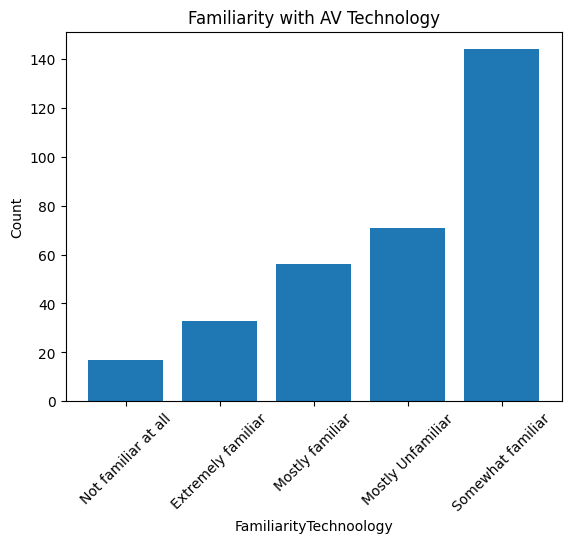

In [25]:
# Display histogram of FamiliarityTechnoology variable
# Surveyed people share to what extent they're familiar with AV technology
tech_counts = bikepghmembers2017['FamiliarityTechnoology'].value_counts()
tech_sorted_counts = tech_counts.sort_values(ascending=True)
plt.bar(tech_sorted_counts.index, tech_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('FamiliarityTechnoology')
plt.ylabel('Count')
plt.title('Familiarity with AV Technology')
plt.show()

In [26]:
#Displays count of each response under FamiliarityTechnoology
bikepghmembers2017.groupby('FamiliarityTechnoology')['FamiliarityTechnoology'].size()

FamiliarityTechnoology
Extremely familiar      33
Mostly Unfamiliar       71
Mostly familiar         56
Not familiar at all     17
Somewhat familiar      144
Name: FamiliarityTechnoology, dtype: int64

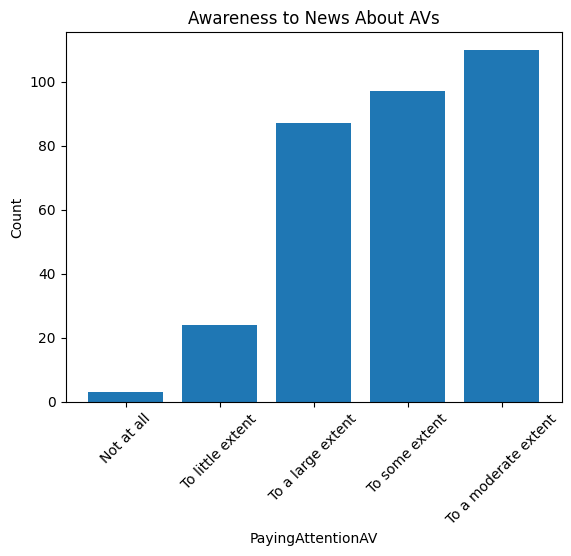

In [27]:
# Display histogram of PayingAttentionAV variable
# Shows to what extent the people surveyed pay attention to news about AVs
news_counts = bikepghmembers2017['PayingAttentionAV'].value_counts()
news_sorted_counts = news_counts.sort_values(ascending=True)
plt.bar(news_sorted_counts.index, news_sorted_counts)
plt.xticks(rotation=45)
plt.xlabel('PayingAttentionAV')
plt.ylabel('Count')
plt.title('Awareness to News About AVs')
plt.show()

In [28]:
#Displays count of each response under PayingAttentionAV
bikepghmembers2017.groupby('PayingAttentionAV')['PayingAttentionAV'].size()

PayingAttentionAV
Not at all                3
To a large extent        87
To a moderate extent    110
To little extent         24
To some extent           97
Name: PayingAttentionAV, dtype: int64

Correlation Data

In [29]:
#Select columns for correlation
correlation_cols = ['InteractPedestrian', 'InteractBicycle','SafetyHuman', 'SafetyAV', 'AVSafetyPotential', 'PayingAttentionAV', 'FamiliarityTechnoology']
df = bikepghmembers2017[correlation_cols]
#Remove entries with missing values
df.dropna(inplace=True)
categories = ['InteractPedestrian', 'InteractBicycle','SafetyHuman', 'SafetyAV', 'PayingAttentionAV', 'FamiliarityTechnoology']

for var in categories:
    contingency_table = pd.crosstab(df['AVSafetyPotential'], df[var])
    chi2, p_value, _, _= stats.chi2_contingency(contingency_table)
    print(f'Chi-Square Test of Independence between AvSafetyPotential and {var}:')
    print(f'Chi-square statistic: {chi2}')
    print(f'p-value: {p_value}')

Chi-Square Test of Independence between AvSafetyPotential and InteractPedestrian:
Chi-square statistic: 8.318385385803097
p-value: 0.21569312496830564
Chi-Square Test of Independence between AvSafetyPotential and InteractBicycle:
Chi-square statistic: 12.77440704883901
p-value: 0.0467615846000071
Chi-Square Test of Independence between AvSafetyPotential and SafetyHuman:
Chi-square statistic: 11.982686473548252
p-value: 0.6803390873964937
Chi-Square Test of Independence between AvSafetyPotential and SafetyAV:
Chi-square statistic: 132.56193134665313
p-value: 6.6911578991268695e-21
Chi-Square Test of Independence between AvSafetyPotential and PayingAttentionAV:
Chi-square statistic: 36.73091963551637
p-value: 0.00024698691748524314
Chi-Square Test of Independence between AvSafetyPotential and FamiliarityTechnoology:
Chi-square statistic: 55.42700367932018
p-value: 1.5172468533163263e-07


C:\Users\physi\AppData\Local\Temp\ipykernel_11088\309049841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
